# Cardiovascular Disease Prediction

## Problem Statement

**Cardiovascular disease (CVD)** is a leading cause of morbidity and mortality worldwide, often developing silently over time. Early identification of individuals at high risk can enable timely interventions and reduce serious health complications. However, predicting who is most at risk is challenging due to the complex interaction of factors such as age, body mass index (BMI), lifestyle habits, and medical history.

This project aims to analyze patient medical records and lifestyle data to identify patterns and risk factors associated with cardiovascular disease. By building a predictive model, the goal is to estimate the likelihood of CVD in patients, providing a tool to support early detection and informed healthcare decisions.

## Data Dictionary

| Feature                     | Description                                |
|-------------------------------|--------------------------------------------|
| General Health              | General health condition                   |
| Checkup                     | Last checkup                               |
| Exercise                     | Whether the patient exercises             |
| Heart Disease                | Whether the patient has heart disease     |
| Skin Cancer                  | Whether the patient has skin cancer       |
| Other Cancer                 | Whether the patient has other cancer      |
| Depression                   | Whether the patient has depression        |
| Diabetes                     | Whether the patient has diabetes          |
| Arthritis                    | Whether the patient has arthritis         |
| Sex                          | Patient's gender                           |
| Age-Category                 | Patient's age category                     |
| BMI                          | Patient's Body Mass Index                  |
| Smoking History              | Patient's smoking history                  |
| Alcohol Consumption          | Patient's alcohol consumption              |
| Fruit Consumption            | Patient's fruit consumption                |
| Green Vegetable Consumption  | Patient's green vegetable consumption     |
| Fried Potato Consumption     | Patient's fried potato consumption        |


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('/content/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Data Preprocessing

In [4]:
# Checking the shape of the dataset
df.shape

(308854, 19)

In [5]:
# Checking for null/missing values
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [6]:
# Checking the datatypes
df.dtypes

,0
General_Health,object
Checkup,object
Exercise,object
Heart_Disease,object
Skin_Cancer,object
Other_Cancer,object
Depression,object
Diabetes,object
Arthritis,object
Sex,object


The dataset originally included Weight, Height, and BMI columns. Since BMI is calculated from Weight and Height, the Weight and Height columns were removed from the dataset.

In [7]:
# Drop Column
df.drop(columns=['Weight_(kg)', 'Height_(cm)'], inplace=True)

In [8]:
# Unique values in each column
for i in df.columns:
    print(i, df[i].unique())

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
BMI [14.54 28.29 33.47 ... 63.83 19.09 56.32]
Smoking_History ['Yes' 'No']
Alcohol_Consumption [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
Fruit_Consumption [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56.  48.  27.  7

The Diabetes column contains four values: Yes, No, No pre-diabetes or borderline diabetes, and Yes but only during pregnancy. The last two values have been replaced with "Pre-diabetes" and "Gestational Diabetes," respectively, for clarity.

In [9]:
df['Diabetes'] = df['Diabetes'].map({'No, pre-diabetes or borderline diabetes': 'Pre-Diabetes' ,'Yes, but female told only during pregnancy' : 'Gestational Diabetes', 'Yes': 'Yes', 'No': 'No'})

### Outliner removal

In [10]:
# columns for outlier removal
cols  = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR for the selected columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

#Find index of outliers
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

#Drop outliers
df = df.drop(df.index[index])

In [12]:
# checking the statistical values
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,186777.000000,186777.000000,186777.000000,186777.000000,186777.000000
mean,28.303577,2.505287,18.446104,11.893440,4.899565
std,5.433758,3.777076,10.898445,9.604871,4.261893
min,12.870000,0.000000,0.000000,0.000000,0.000000
25%,24.370000,0.000000,8.000000,4.000000,2.000000
50%,27.550000,0.000000,16.000000,8.000000,4.000000
75%,31.750000,4.000000,30.000000,16.000000,8.000000
max,43.280000,15.000000,56.000000,44.000000,17.000000


In [13]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


## Exploratory Data Analysis

The exploratory data analysis focuses on understanding the dataset and examining the relationships between features and the target variable. The analysis begins with exploring the distribution of values across all variables, followed by investigating how each feature relates to the target variable. This process provides insights that support the development of an effective predictive model.

### Patient demographics

/tmp/ipython-input-87414769.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution')

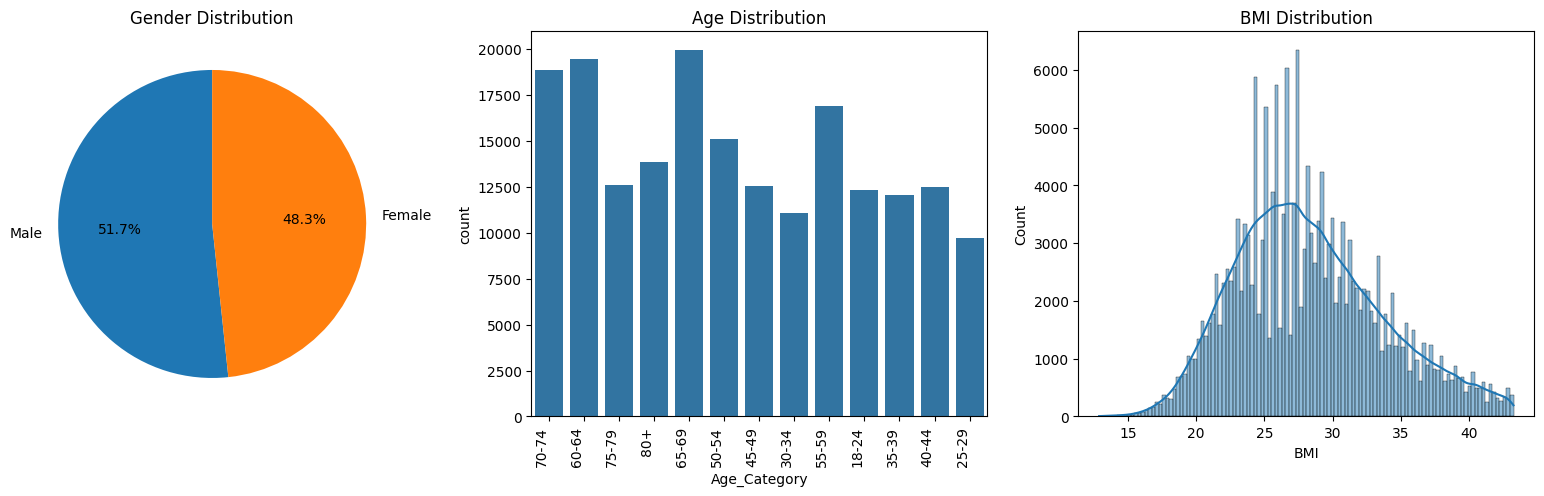

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

The three graphs provide an overview of the demographic characteristics of patients in the dataset. The pie chart indicates a slightly higher proportion of male patients (52%) compared to female patients (48%). Age analysis shows that the majority of individuals are over 45 years old, suggesting the dataset is weighted toward older age groups. The BMI distribution highlights that most patients fall within the 25–30 range, classifying them as overweight. These observations support the hypothesis that higher BMI may be associated with an increased risk of cardiovascular disease.

### General Health and Last Checkup

Text(0.5, 1.0, 'General Health and Checkup')

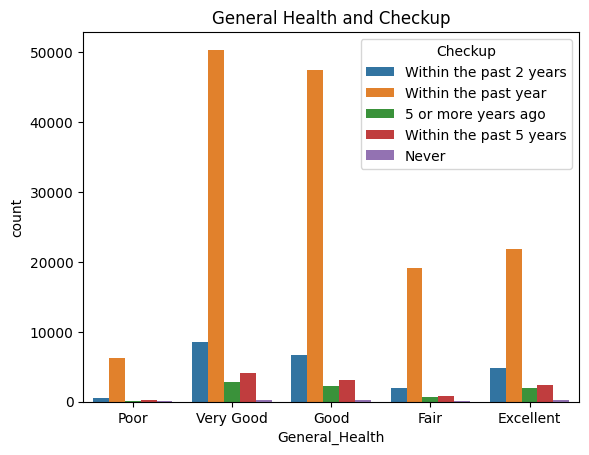

In [15]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Checkup').set_title('General Health and Checkup')

The graph shows that most individuals report being in good or very good health, followed by those in excellent health, indicating that the majority of the dataset consists of generally healthy patients. Only a small proportion of individuals report poor health. Examining the timing of the last medical checkup reveals that most patients across all health categories have had a checkup within the past year. However, a significant number of individuals have not had a checkup for five years or more, which may increase the risk of undetected cardiovascular disease.

### Excersise and General Health

Text(0.5, 1.0, 'General Health and Exercise')

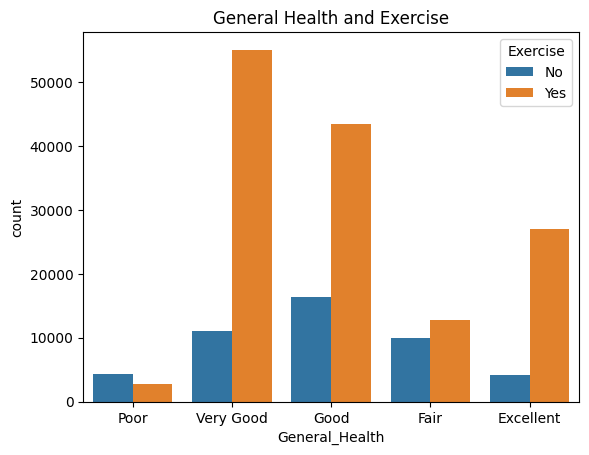

In [16]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Exercise').set_title('General Health and Exercise')

The role of exercise in general health is evident thtough this graph. The people who excersise regularly are more likely to be in good or very good or even in excellent health. However, the people who do not excersise are more likely to be in poor health. This means that excersise plays an important role in maintaining good health.

### Food Consumption

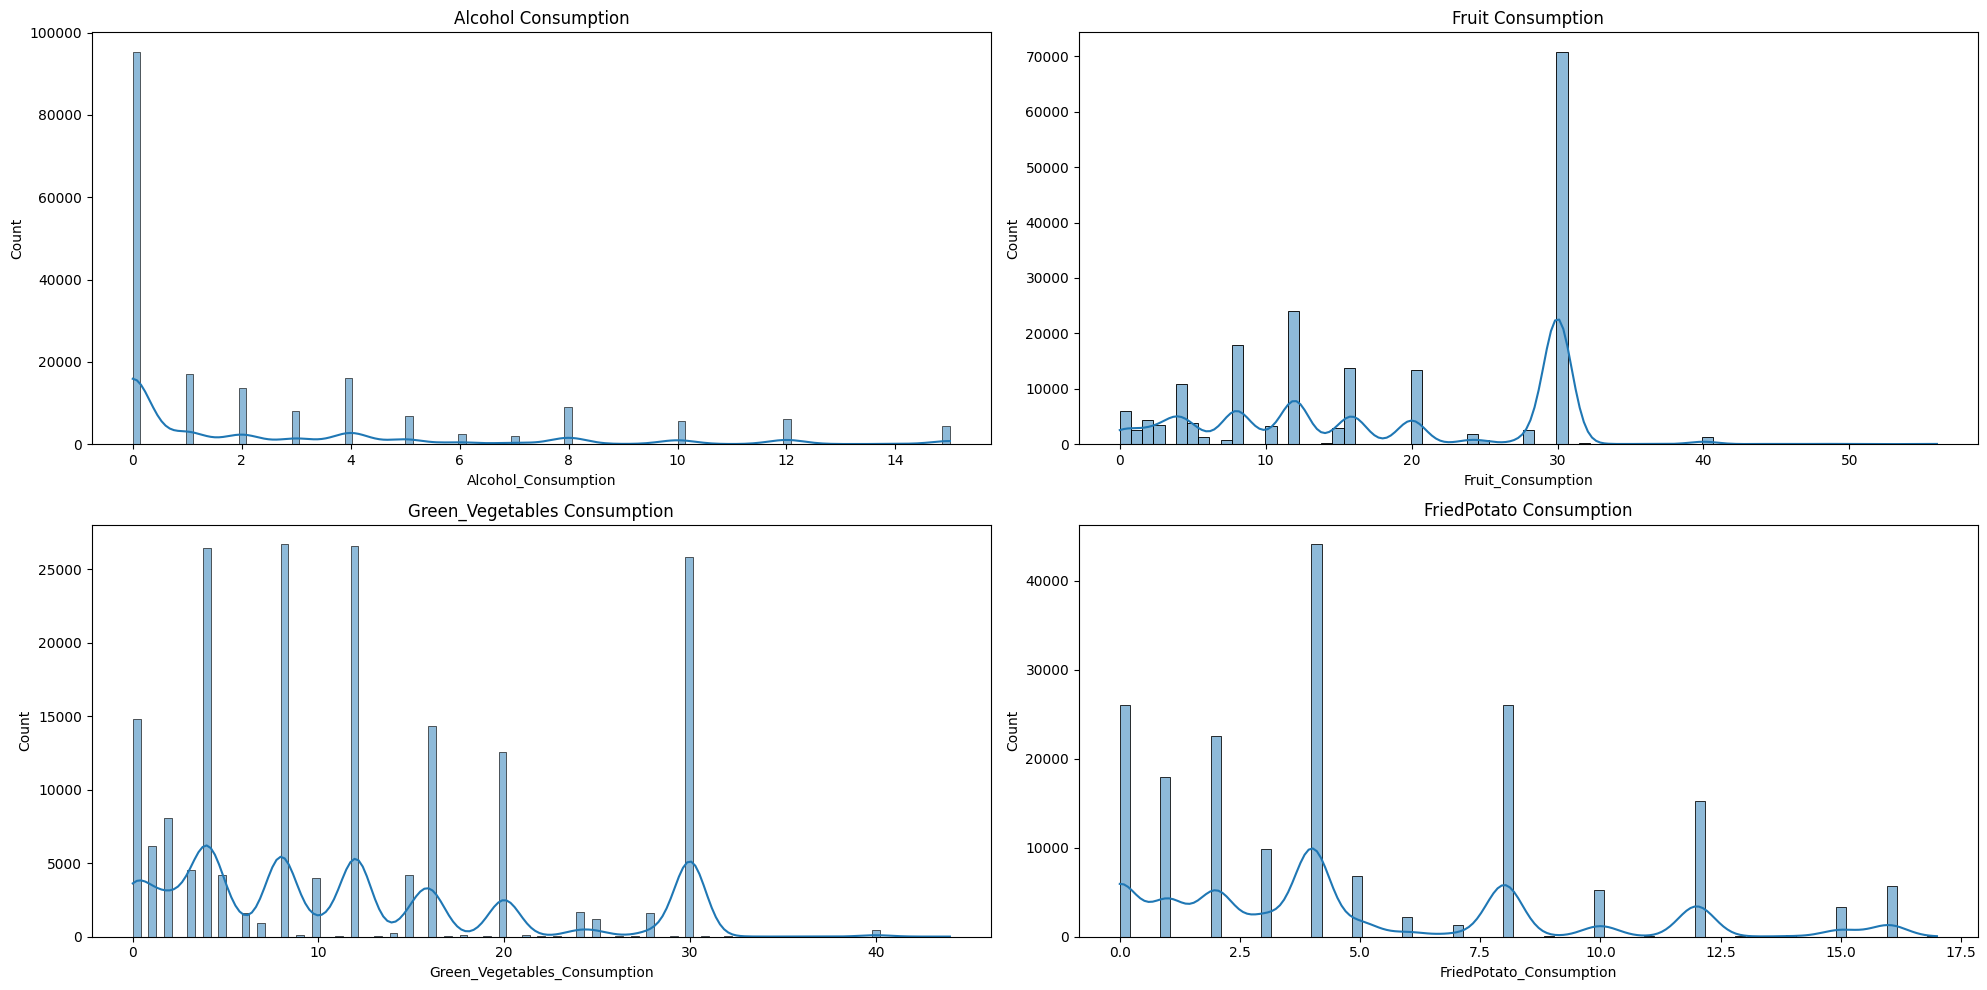

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'Alcohol_Consumption', data = df, ax = ax[0,0], kde = True).set_title('Alcohol Consumption')
sns.histplot(x = 'Fruit_Consumption', data = df, ax = ax[0,1], kde = True).set_title('Fruit Consumption')
sns.histplot(x = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0], kde = True).set_title('Green_Vegetables Consumption')
sns.histplot(x = 'FriedPotato_Consumption', data = df, ax = ax[1,1], kde = True).set_title('FriedPotato Consumption')
plt.tight_layout()

These plots illustrate the dietary and drinking habits of the patients. The data shows that the majority of patients do not consume alcohol. Regarding food intake, most patients consume ample amounts of fruits and green vegetables, which is beneficial for health. However, a large number of patients also consume fried potatoes, which is less healthy. These observations suggest that patients who consume fried foods and alcohol may have a higher risk of developing cardiovascular disease.

### Medical History

Text(0.5, 1.0, 'Arthritis')

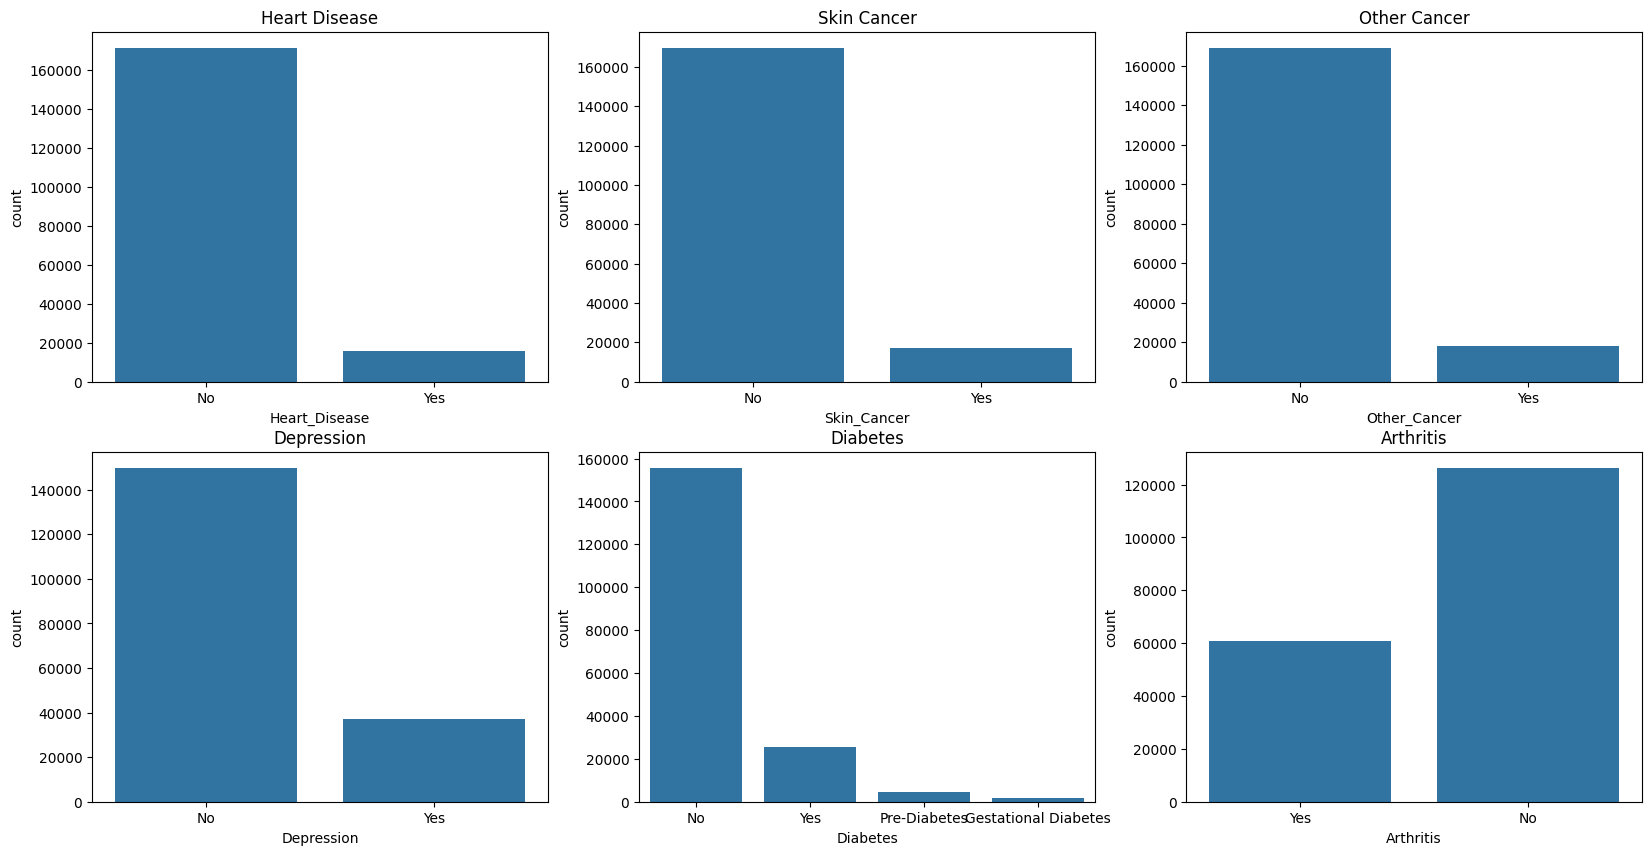

In [18]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data = df, ax = ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2]).set_title('Arthritis')

Most patients do not have any medical conditions, but some have conditions such as heart disease, skin cancer, other cancers, depression, diabetes, and arthritis. Among these, depression is more prevalent compared to other conditions, highlighting the importance of addressing mental health alongside physical health. Additionally, a portion of patients are pre-diabetic, and some female patients experience gestational diabetes.

### Patient's Smoking History

Text(0.5, 1.0, 'Smoking History')

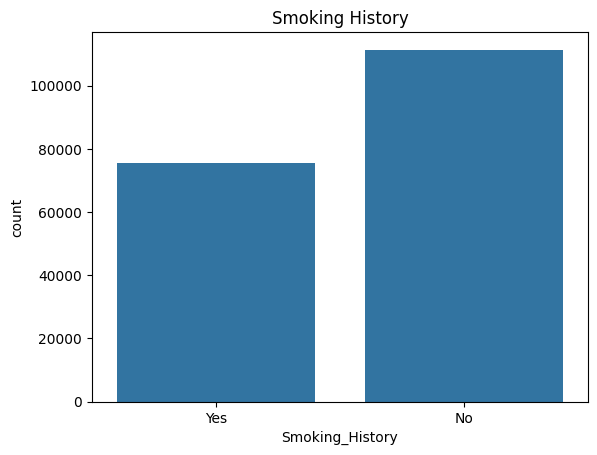

In [19]:
sns.countplot(x = 'Smoking_History', data = df ).set_title('Smoking History')

This graph illustrates the smoking history of patients in the dataset. The majority of patients have never smoked, but a significant number are current smokers. These observations suggest that current smokers may have a higher risk of developing cardiovascular disease.

## Target Variable and Independent Variables Visualization
Patient's Demographics and Heart Disease

/tmp/ipython-input-1378494049.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

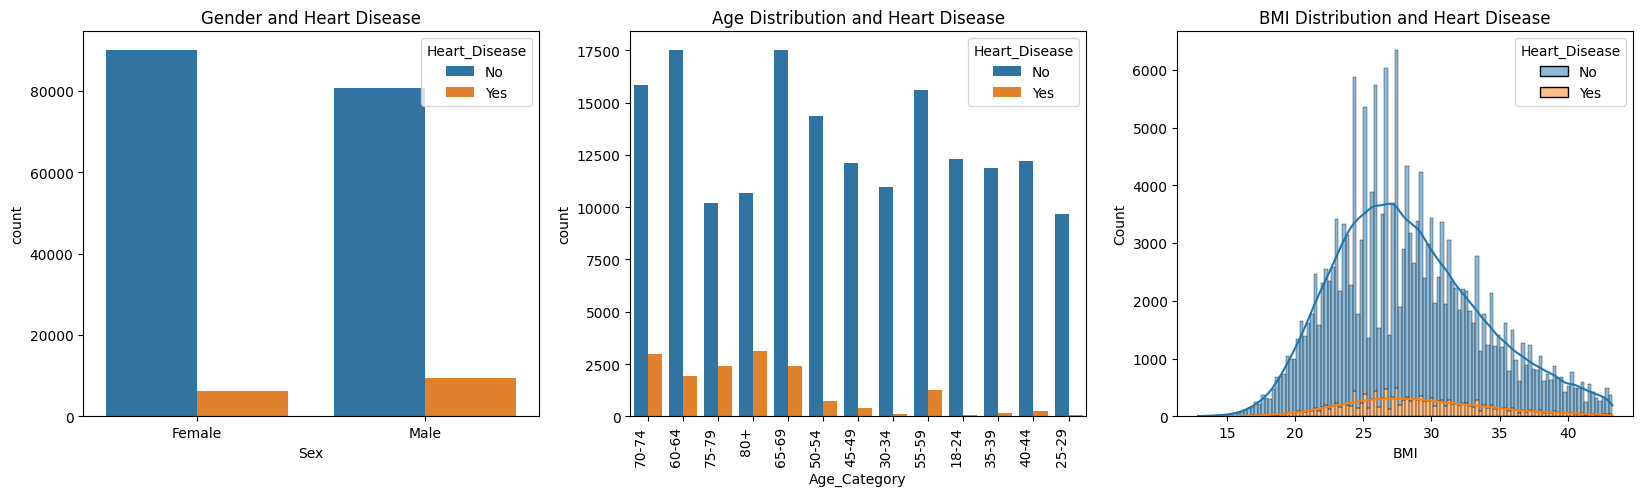

In [20]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

Visualizing patient demographics alongside heart disease provides insights into the relationship between patient characteristics and cardiovascular risk. The gender graph shows that males are more likely to develop heart disease compared to females. The age distribution indicates that patients older than 55 years experience a higher incidence of heart disease, with the highest cases observed in patients aged 80 and above, suggesting that cardiovascular risk increases with age. The BMI graph reveals that patients classified as overweight (BMI 25–30) are more likely to have heart disease.

### General Health and Heart Disease

Text(0.5, 1.0, 'General Health and Heart Disease')

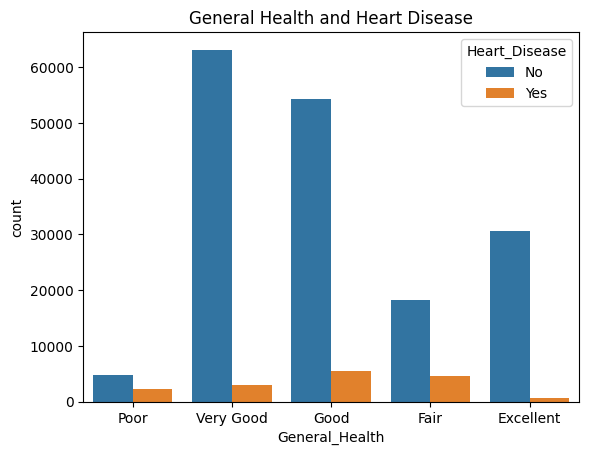

In [21]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Heart_Disease').set_title('General Health and Heart Disease')

This graph challenges the assumption that healthier patients are less likely to develop heart disease. Surprisingly, patients reporting good or very good general health show a higher incidence of heart disease compared to those with poor general health.

### Checkup and Heart Disease

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

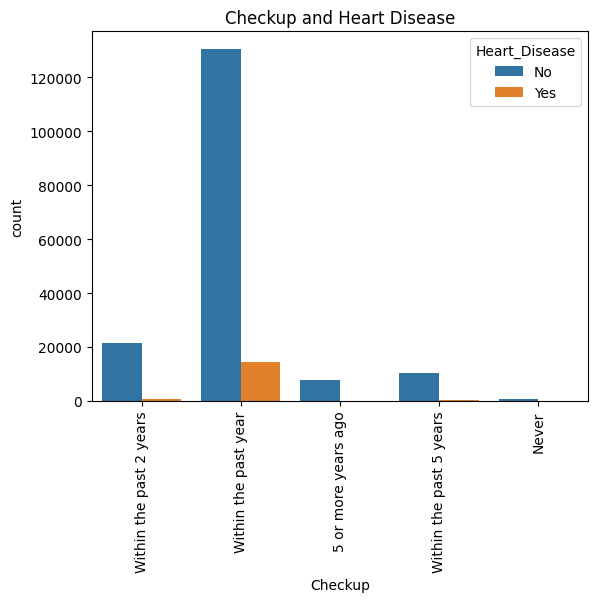

In [22]:
sns.countplot(x = 'Checkup', data = df, hue  = 'Heart_Disease').set_title('Checkup and Heart Disease')
plt.xticks(rotation=90)

This graph indicates that patients who had a checkup within the past year show a higher incidence of heart disease. This suggests that individuals who undergo regular medical checkups are more likely to have cardiovascular disease detected early compared to those who do not get checked regularly.

### Excercise and Heart Disease

Text(0.5, 1.0, 'Exercise and Heart Disease')

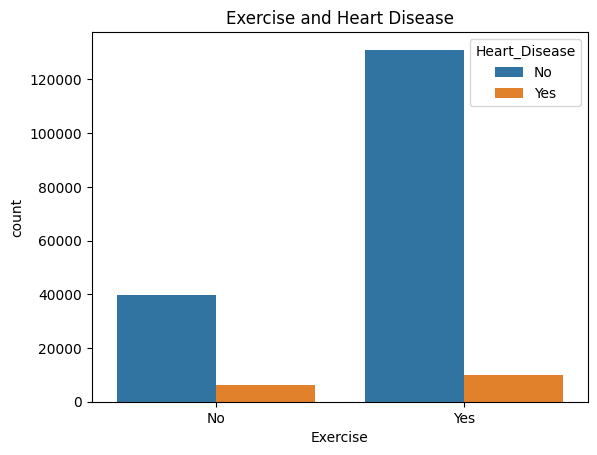

In [23]:
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease').set_title('Exercise and Heart Disease')

Surprisingly, patients who exercise regularly show higher rates of heart disease, contrary to the usual expectation that exercise is protective. Patients who do not exercise appear less affected. This may reflect that individuals with pre-existing heart conditions could be placing extra strain on their hearts during physical activity, contributing to increased risk.

### Food Consumption and Heart Disease

Text(0.5, 1.0, 'FriedPotato Consumption and Heart Disease')

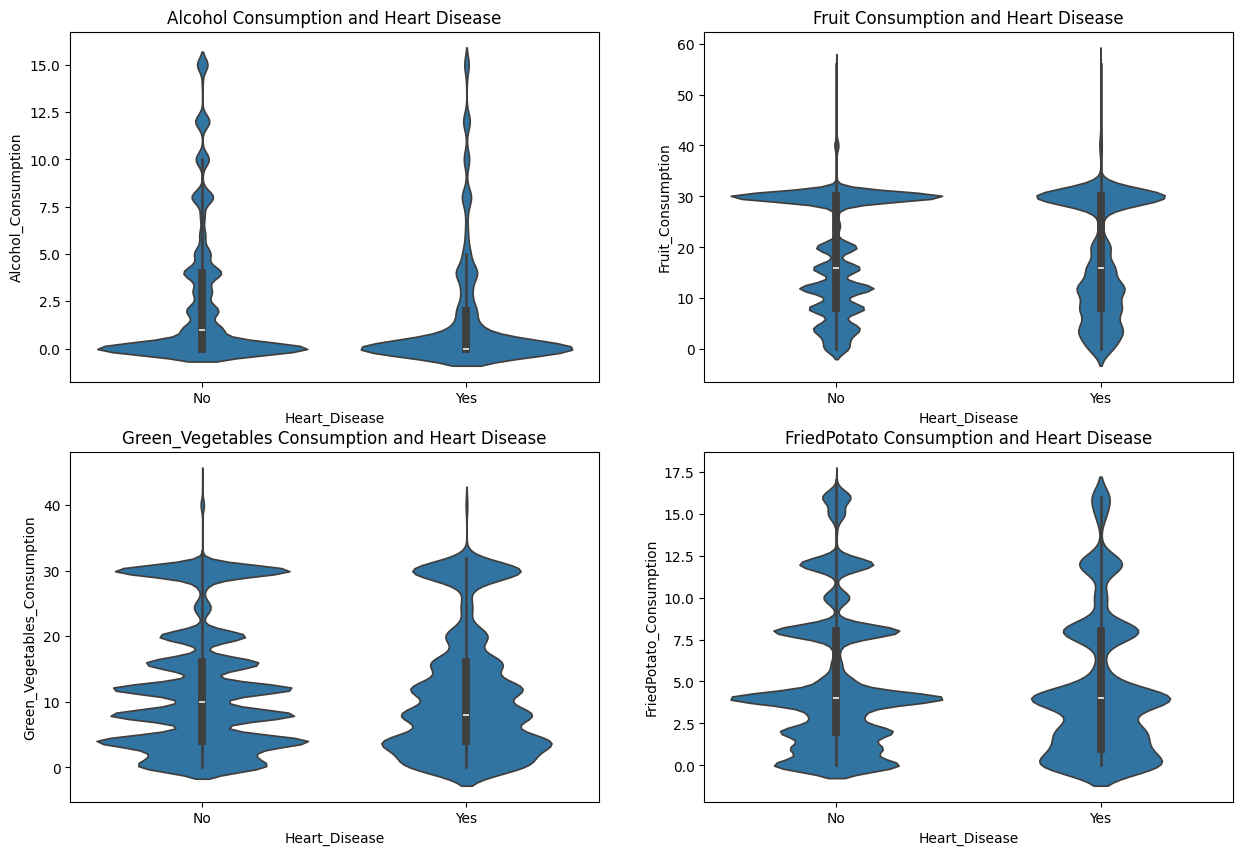

In [24]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = df, ax = ax[0,0]).set_title('Alcohol Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = df, ax = ax[0,1]).set_title('Fruit Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0]).set_title('Green_Vegetables Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'FriedPotato_Consumption', data = df, ax = ax[1,1]).set_title('FriedPotato Consumption and Heart Disease')

These graphs illustrate the relationship between patients’ dietary and drinking habits and the occurrence of heart disease. The alcohol consumption graph shows that higher alcohol intake is associated with a lower observed rate of heart disease. Patients with higher consumption of fruits and green vegetables tend to have a reduced risk of heart disease, while those who consume more fried potatoes show an increased risk.

### Medical History and Heart Disease

Text(0.5, 1.0, 'Arthritis and Heart Disease')

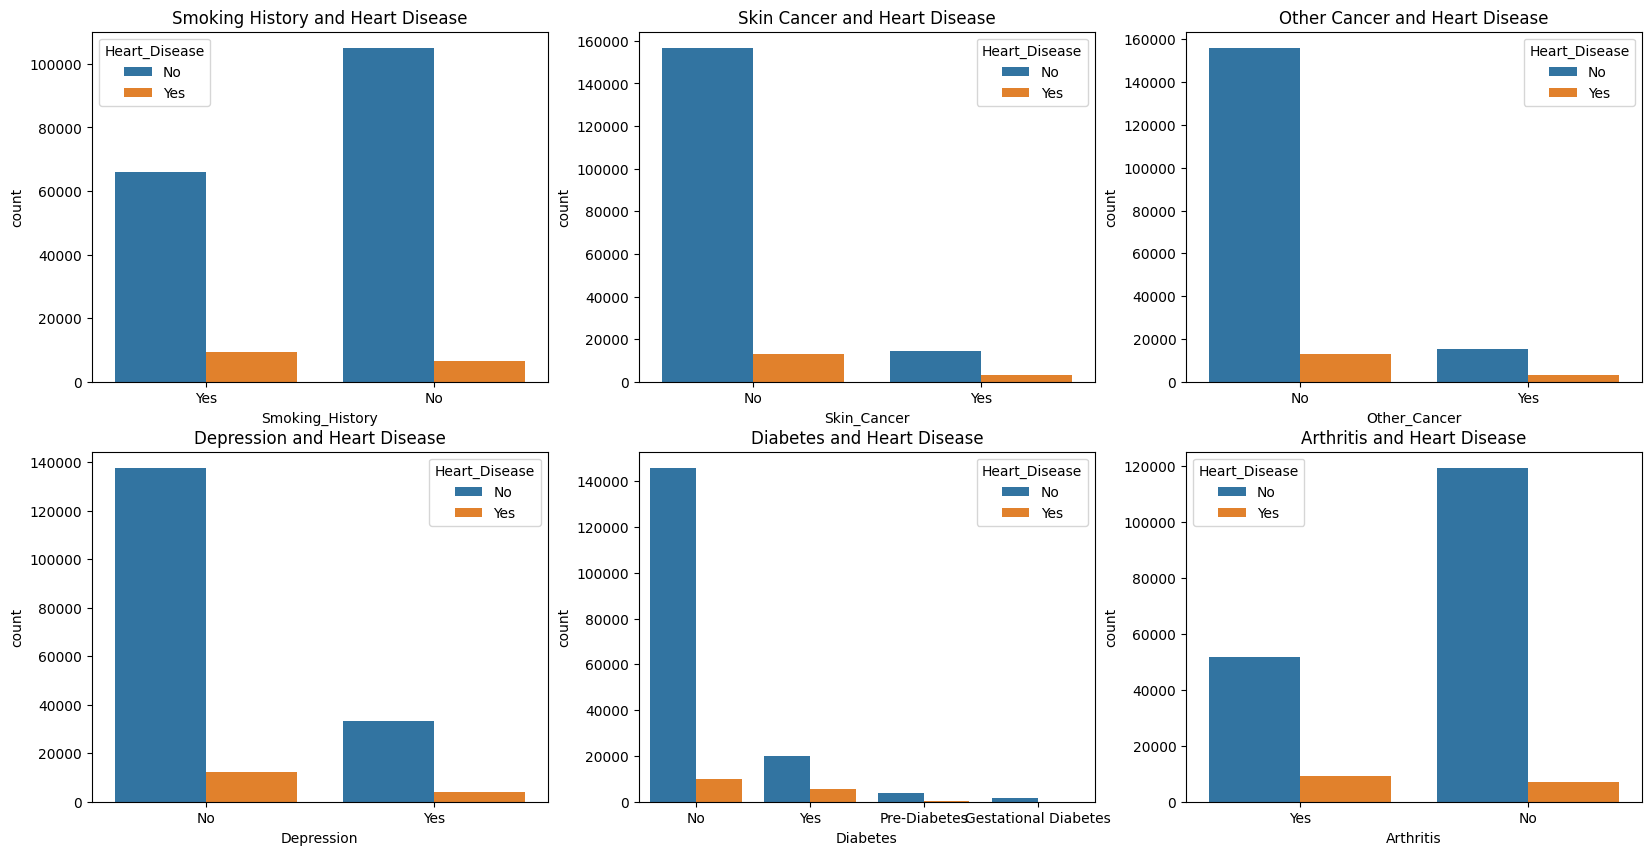

In [25]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Smoking_History', data = df, ax = ax[0,0], hue = 'Heart_Disease').set_title('Smoking History and Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1], hue = 'Heart_Disease').set_title('Skin Cancer and Heart Disease')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2], hue = 'Heart_Disease').set_title('Other Cancer and Heart Disease')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0], hue = 'Heart_Disease').set_title('Depression and Heart Disease')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1], hue = 'Heart_Disease').set_title('Diabetes and Heart Disease')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2], hue = 'Heart_Disease').set_title('Arthritis and Heart Disease')

These graphs illustrate the relationship between patients’ medical history and the occurrence of heart disease. The smoking history graph shows that current or former smokers have a higher incidence of cardiovascular disease. Interestingly, the graphs for skin cancer, other cancers, depression, diabetes, and arthritis indicate that patients without these conditions often show higher rates of heart disease compared to those with the conditions. Additionally, pre-diabetes and gestational diabetes appear to have little to no effect on heart disease.

Overall, these observations suggest that a patient’s medical history does not have a major impact on the likelihood of developing cardiovascular disease.

## Data Preprocessing II

Label Encoding the Categorical Variables

In [26]:
from sklearn.preprocessing import LabelEncoder

# List of categorical variables
cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis',	'Sex',	'Age_Category', 'Smoking_History']

# Label encoding object
le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [1 3 2 0]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  2  7  0  3  4  1]
Smoking_History [1 0]


## Coorelation Matrix Heatmap

<Axes: >

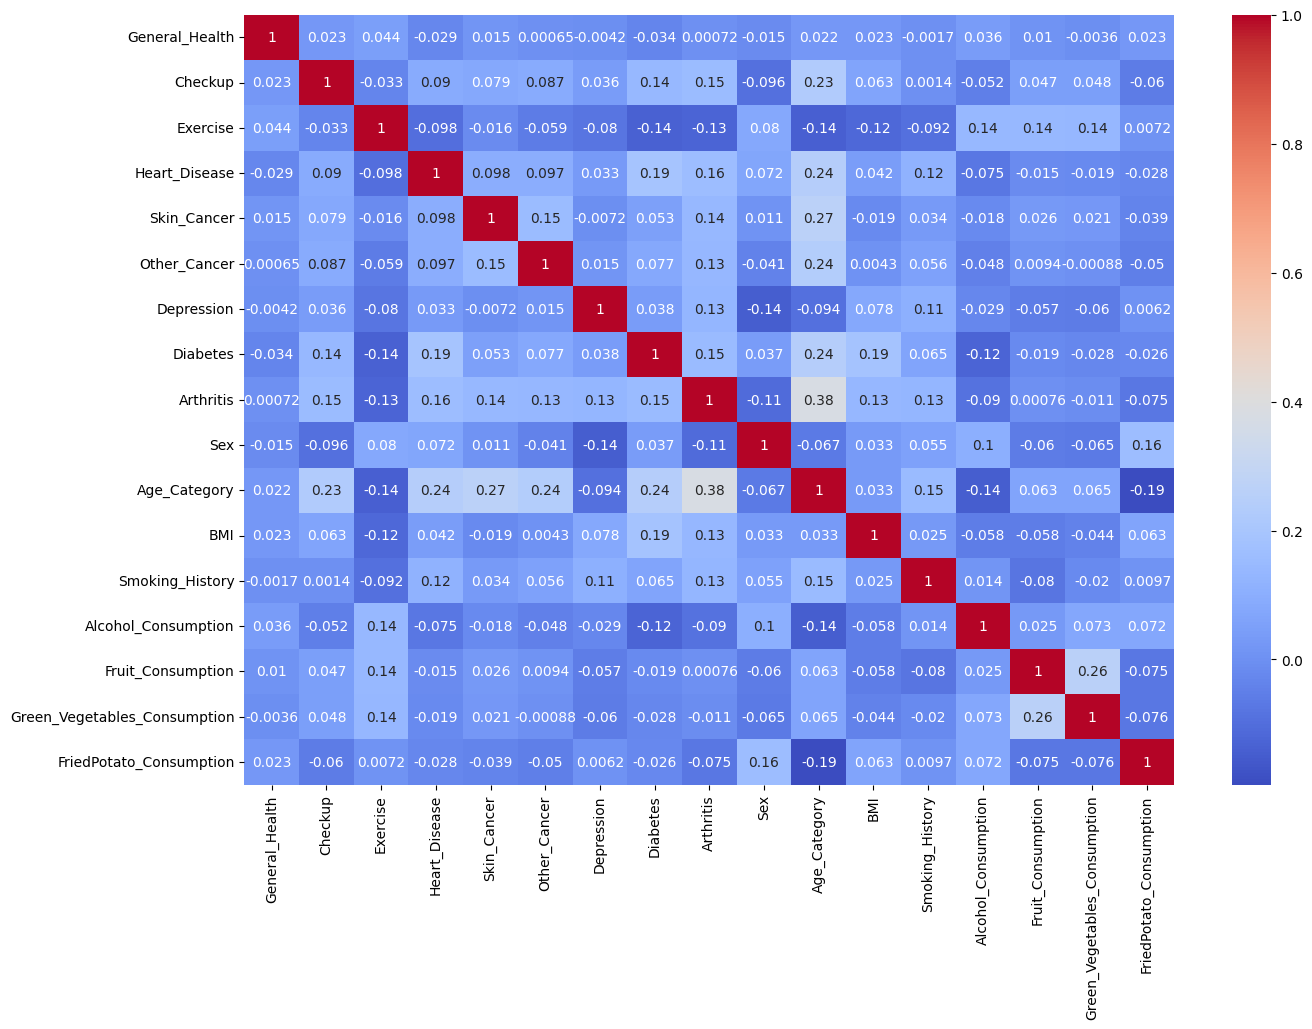

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

No significant correlation is observed among the variables.

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Heart_Disease']), df['Heart_Disease'], test_size = 0.2, random_state = 0)

## Cardiovascular Disease Prediction
For predicting the cardiovascular disease, I have used the following classification models:

- Random Forest Classifier
- Decision Tree Classifier

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest object
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')

In [30]:
# Training the model
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [31]:
# Training accuracy
rfc.score(X_train, y_train)

0.9999866150005688

In [32]:
# Predicting the test set results
rfc_pred = rfc.predict(X_test)

## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree object
dtc = DecisionTreeClassifier(random_state=0, max_depth= 12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

In [34]:
# Training the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [35]:
# Training accuracy
dtc.score(X_train, y_train)

0.73877835110192

In [36]:
# Predicting the test set results
dtc_pred = dtc.predict(X_test)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [38]:
# Training the model
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Training accuracy
lr.score(X_train, y_train)

0.9142289236452708

In [40]:
# Predicting the test set results
lr_pred = lr.predict(X_test)

## Model Evalution
Confusion Matrix

Text(0.5, 1.0, 'Logistic Regression')

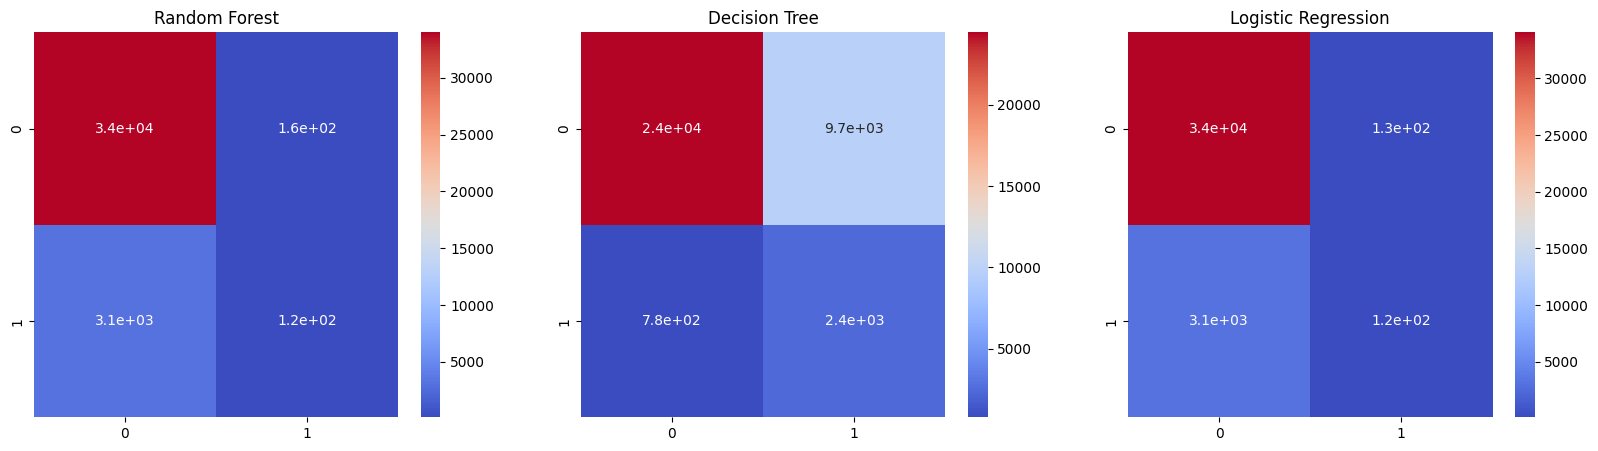

In [41]:
from sklearn.metrics import confusion_matrix
fig, ax  = plt.subplots(1,3, figsize = (20,5))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, cmap = 'coolwarm', ax = ax[0]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot = True, cmap = 'coolwarm', ax = ax[1]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot = True, cmap = 'coolwarm', ax = ax[2]).set_title('Logistic Regression')

Random Forest

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, rfc_pred))
print('Precision Score: ', precision_score(y_test, rfc_pred))
print('Recall Score: ', recall_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred))

Random Forest
Accuracy Score:  0.9137755648356355
Precision Score:  0.4166666666666667
Recall Score:  0.03622047244094488
F1 Score:  0.06664734859461026


Decision Tree

In [43]:
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, dtc_pred))
print('Precision Score: ', precision_score(y_test, dtc_pred))
print('Recall Score: ', recall_score(y_test, dtc_pred))
print('F1 Score: ', f1_score(y_test, dtc_pred))

Decision Tree
Accuracy Score:  0.718920655316415
Precision Score:  0.19753902056321745
Recall Score:  0.7533858267716536
F1 Score:  0.31300706621303326


Logistic Regression

In [44]:
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print('Precision Score: ', precision_score(y_test, lr_pred))
print('Recall Score: ', recall_score(y_test, lr_pred))
print('F1 Score: ', f1_score(y_test, lr_pred))

Logistic Regression
Accuracy Score:  0.9147124959845808
Precision Score:  0.47808764940239046
Recall Score:  0.03779527559055118
F1 Score:  0.07005253940455342


## Conclusion
The exploratory data analysis indicates several factors associated with cardiovascular disease risk. The likelihood of developing the disease increases with age, with individuals over 55 being more susceptible and the highest incidence observed in patients aged 80 and above. Higher BMI is also linked to an increased risk. Interestingly, older patients who exercise show higher rates of cardiovascular disease, possibly due to additional strain on the heart.

Dietary habits also play a role: patients consuming more fruits and green vegetables tend to have a lower risk, whereas higher consumption of fried potatoes is associated with increased risk. Smoking history contributes to higher susceptibility, with current or former smokers being more prone to the disease. In contrast, a patient’s previous medical history, including conditions such as cancer, arthritis, diabetes, or depression, appears to have little to no effect on cardiovascular disease risk.